# Converting an Image to Grayscale

In this exploration, you'll practice using Matplotlib and NumPy to convert a full-color image to grayscale by manipulating color channels.  You'll make use of the [Luminosity method](https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/) to end up with a brighter, sharper image at the end.

In [3]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = mpimg.imread("kitty.jpg")
print(type(img))
print(img.shape)
img

<class 'numpy.ndarray'>
(866, 1280, 3)


array([[[ 96, 131,  51],
        [ 94, 129,  49],
        [ 92, 127,  45],
        ...,
        [155, 172, 130],
        [156, 173, 131],
        [157, 172, 131]],

       [[ 92, 127,  47],
        [ 91, 126,  46],
        [ 89, 124,  42],
        ...,
        [155, 172, 130],
        [157, 174, 132],
        [158, 173, 132]],

       [[ 88, 123,  43],
        [ 87, 122,  40],
        [ 86, 121,  39],
        ...,
        [156, 173, 131],
        [158, 175, 133],
        [160, 175, 134]],

       ...,

       [[139, 175, 137],
        [141, 177, 139],
        [138, 176, 137],
        ...,
        [103, 129, 102],
        [124, 154, 116],
        [123, 160, 108]],

       [[140, 176, 132],
        [138, 174, 130],
        [137, 174, 130],
        ...,
        [105, 137, 100],
        [117, 156, 112],
        [125, 171, 124]],

       [[137, 173, 129],
        [135, 171, 127],
        [134, 171, 127],
        ...,
        [105, 137, 100],
        [116, 155, 111],
        [125, 171, 124]]

## Testing Out the Pixels by Dropping Red and Green

The original image is read-only, so you can't manipulate it directly.  You'll need to create a copy before you drop the red and green channels.

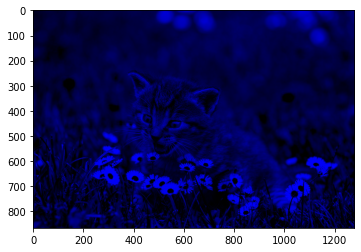

In [4]:
output = img.copy()
output[:, :, :2] = 0
mpimg.imsave("blue.jpg", output)
plt.imshow(output)
plt.show()

## A Naive Grayscale: Averaging

A grayscale image is nothing more than an image where each pixel's red, green, and blue values are equal.  The magnitude of this value ends up being this pixel's brightness.

However, the way you calculate this brightness is important to how the overall image comes out.  Blue "looks" darker than red and green "looks" brighter, so you have to account for that.  Here's what happens if you do it the naive way and just take the average.

(You'll output the image with only a single channel and use a `cmap` to help Matplotlib figure out how to interpolate the color.)

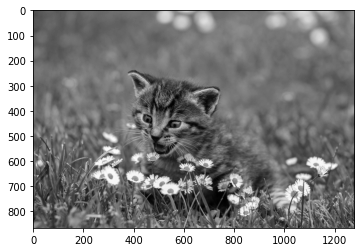

In [5]:
averages = img.mean(axis=2)
mpimg.imsave("bad-gray.jpg", averages, cmap="gray")
plt.imshow(averages, cmap="gray")
plt.show()

## A Better Grayscale: the Luminosity Method

The Luminosity method (linked above) performs a *weighted* average, punching up the red and pulling back on the green a little bit to account for how humans perceive color.  Matrix dot products are a quick way to perform this weighted addition.

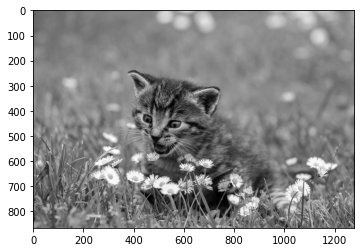

In [6]:
weights = np.array([0.3, 0.59, 0.11])
grayscale = img @ weights
mpimg.imsave("good-gray.jpg", grayscale, cmap="gray")
plt.imshow(grayscale, cmap="gray")
plt.show()

See how the second image is brighter and edges are sharper?  Overall, it feels a little less "muddy."